In [2]:
import uproot3 as uproot
import uproot_methods
import uproot_methods.classes.TLorentzVector as LVepm
import matplotlib.pyplot as plt
import time
import infofile
import numpy as np
import mplhep as hep
from scipy import stats
import boost_histogram as bh
import pandas as pd

In [22]:
samples = ["twz 3l", "ttz 3l", "twz_4l","ttz_4l"]

yields = {
          #"twz 3l": np.array([97.006624, 77.049984, 31.757088]),
          #"ttz 3l": np.array([412.173432, 448.50828 , 212.331768]),
          "twz_4l": np.array([25.42649472, 20.69243264,  8.9718112 ]),
          "ttz_4l": np.array([101.1698424 , 109.41331104,  41.96674944])
         }


twz_diff_xsec = yi


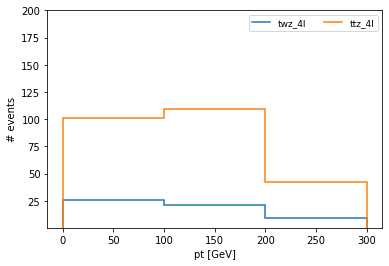

In [25]:
plot_zpt_diff_xs = []
plot_zpt_diff_xs_true = []

bins_ll_pt = np.linspace(0.0, 300.0, num=4)

hists = list(yields.values())
labels = list(yields.keys())

plt.figure()
hep.histplot(hists, bins=bins_ll_pt, stack=False, label=labels, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 200])
plt.show()

   

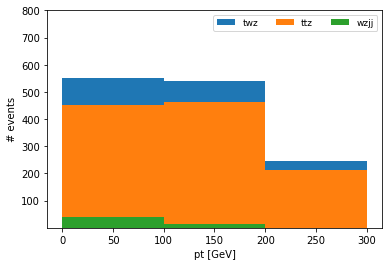

No handles with labels found to put in legend.


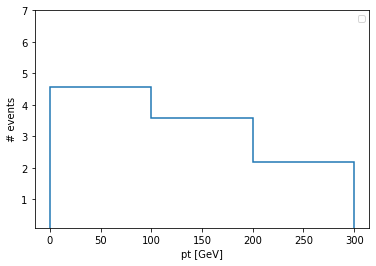

'\nplt.figure()\nhep.histplot(plot_ll_pt_true, bins=bins_ll_pt, stack=True, label=samples, histtype=\'fill\')\nplt.legend(loc=1, ncol=3, fontsize=9)\nplt.xlabel("Z pt [GeV]")\nplt.ylabel("# events")\n#plt.yscale(\'log\')\nplt.ylim([0.1, 1200])\nplt.show()\n\nplt.figure()\nhep.histplot(plot_ll_masses, bins=bins_ll_masses, stack=True, label=samples, histtype=\'fill\')\nplt.legend(loc=1, ncol=3, fontsize=9)\nplt.xlabel("mass [GeV]")\nplt.ylabel("# events")\n#plt.yscale(\'log\')\nplt.ylim([0.1, 300])\nplt.show()\n\nplt.figure()\nhep.histplot(plot_nbtag, bins=bins_nbtag, stack=False, label=samples, histtype=\'step\')\nplt.legend(loc=1, ncol=3, fontsize=9)\nplt.xlabel("n btags")\nplt.ylabel("# events")\n#plt.yscale(\'log\')\nplt.ylim([0.1, 25000])\nplt.show()\n\nplt.figure()\nhep.histplot(plot_njet, bins=bins_njet, stack=False, label=samples, histtype=\'step\')\nplt.legend(loc=1, ncol=3, fontsize=9)\nplt.xlabel("n jets")\nplt.ylabel("# events")\n#plt.yscale(\'log\')\nplt.ylim([0.1, 13000])\n

In [32]:
#bin_width = bins_ll_pt[1] - bins_ll_pt[0]
#diff_xs = plot_ll_pt[0]/(intLumi*bin_width)#

plt.figure()
hep.histplot(plot_ll_pt, bins=bins_ll_pt, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 800])
plt.show()

#s/sqrtb()

s_sqrt_b = plot_ll_pt[2] / ( np.sqrt( plot_ll_pt[0] + plot_ll_pt[1]  )  )

plt.figure()
hep.histplot(s_sqrt_b, bins=bins_ll_pt, stack=True, label="", histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 7])
plt.show()



"""
diff_xs_er = (np.sqrt(plot_zpt_diff_xs[0] + plot_zpt_diff_xs[1])) / (BR[isample]*bin_width*(len(z_pt_reco)/30000)*intLumi*1000) 

#print(bin_width)
#print(diff_xs)
print(diff_xs_er)

plt.figure()
hep.histplot(plot_zpt_diff_xs, bins=bins_ll_pt, yerr=diff_xs_er, xerr=True, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.000, 0.015])
plt.show()
"""



"""
plt.figure()
hep.histplot(plot_ll_pt_true, bins=bins_ll_pt, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("Z pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 1200])
plt.show()

plt.figure()
hep.histplot(plot_ll_masses, bins=bins_ll_masses, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("mass [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 300])
plt.show()

plt.figure()
hep.histplot(plot_nbtag, bins=bins_nbtag, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("n btags")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 25000])
plt.show()

plt.figure()
hep.histplot(plot_njet, bins=bins_njet, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("n jets")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 13000])
plt.show()

plt.figure()
hep.histplot(plot_ht, bins=bins_ht, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("ht")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 3075])
plt.show()
"""

In [ ]:
bins_pt_true_mu = np.linspace(0.0, 100.0, num=30)
bins_eta_true_mu = np.linspace(-5.0, 5.0, num=20)
bins_n_true_mu = np.linspace(-0.5, 6.5, num=8)

plot_pt_true_mu = []
plot_eta_true_mu = []
plot_pt_true_e = []
plot_n_true_lep = []

for isample in range(0, len(samples)):
    
    sample_name = str("delphes_output_") + str(samples[isample]) + str("_4l.root")
    eventsData = uproot.open(sample_name)["Delphes"] 
    EventWeight, EventCrossSection, JetPT, JetEta, JetBTag, MuonPT, MuonEta,  MuonPhi,  MuonT, MuonCharge, MuonIsolationVar, MuonDZ, ElectronPT, ElectronEta,  ElectronPhi,  ElectronT, ElectronCharge, ElectronIsolationVar, ParticlePID, ParticleStatus, ParticleMass, ParticlePT, ParticleEta = eventsData.arrays(["Event.Weight", "Event.CrossSection","Jet.PT", "Jet.Eta", "Jet.BTag", "Muon.PT", "Muon.Eta", "Muon.Phi", "Muon.T", "Muon.Charge", "Muon.IsolationVar", "Muon.DZ", "Electron.PT", "Electron.Eta", "Electron.Phi", "Electron.T", "Electron.Charge", "Electron.IsolationVar", "Particle.PID", "Particle.Status","Particle.Mass", "Particle.PT", "Particle.Eta"], outputtype=tuple)
    #eventsData.show()
    
    pt_true_mu = ParticlePT[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>0)]
    pt_true_e = ParticlePT[(abs(ParticlePID)==11) & (abs(ParticleStatus)==1) & (abs(ParticlePT)>0)]
    eta_true_mu = ParticleEta[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>0)]
    n_true_mu = ParticlePT[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>10)].counts
    n_true_e = ParticlePT[(abs(ParticlePID)==11) & (abs(ParticleStatus)==1) & (abs(ParticlePT)>10)].counts
    
    n_true_lep = n_true_mu + n_true_e
    print(n_true_mu)
    print(n_true_e)
    
    H_pt_true_mu, b = np.histogram(pt_true_mu.flatten(), bins=bins_pt_true_mu)
    H_pt_true_e, b = np.histogram(pt_true_e.flatten(), bins=bins_pt_true_mu)
    H_eta_true_mu, b = np.histogram(eta_true_mu.flatten(), bins=bins_eta_true_mu)
    H_n_true_lep, b = np.histogram(n_true_lep, bins=bins_n_true_mu)

    plot_pt_true_mu.append(H_pt_true_mu)
    plot_pt_true_e.append(H_pt_true_e)
    plot_eta_true_mu.append(H_eta_true_mu)
    plot_n_true_lep.append(H_n_true_lep)

plt.figure()
hep.histplot(plot_pt_true_mu, bins=bins_pt_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt mu")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()

plt.figure()
hep.histplot(plot_pt_true_e, bins=bins_pt_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt e")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 120000])
plt.show()

plt.figure()
hep.histplot(plot_eta_true_mu, bins=bins_eta_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("eta mu")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()

plt.figure()
hep.histplot(plot_n_true_lep, bins=bins_n_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("N lep")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()